In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# read in the data from a CSV file

df = pd.read_csv('Bully_data_Final.csv')
print(df.head())
print(df.info())

   record  Bullied_on_school_property_in_past_12_months  \
0       1                                           1.0   
1       2                                           0.0   
2       3                                           0.0   
3       4                                           0.0   
4       5                                           0.0   

   Bullied_0t_on_school_property_in_past_12_months  \
0                                              1.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Cyber_bullied_in_past_12_months  Custom_Age  Gender  Physically_attacked  \
0                              NaN        13.0  Female                  0.0   
1                              0.0        13.0  Female                  0.0   
2                              0.0        14.0    Male                  0.0   
3   

In [4]:
df = df.dropna() # Remove any rows with missing data

In [5]:
print(df.head())# display the first 5 rows of the data and information about the data

print(df.info())

    record  Bullied_on_school_property_in_past_12_months  \
2        3                                           0.0   
3        4                                           0.0   
5        6                                           0.0   
10      11                                           0.0   
13      14                                           0.0   

    Bullied_0t_on_school_property_in_past_12_months  \
2                                               0.0   
3                                               0.0   
5                                               0.0   
10                                              0.0   
13                                              0.0   

    Cyber_bullied_in_past_12_months  Custom_Age  Gender  Physically_attacked  \
2                               0.0        14.0    Male                  0.0   
3                               0.0        16.0    Male                  0.0   
5                               0.0        13.0    Male             

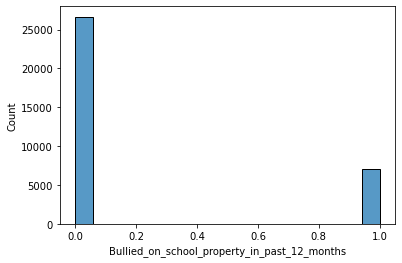

In [6]:
sns.histplot(df['Bullied_on_school_property_in_past_12_months']) ## plot a histogram of the "Bullied_on_school_property_in_past_12_months" column

plt.show()

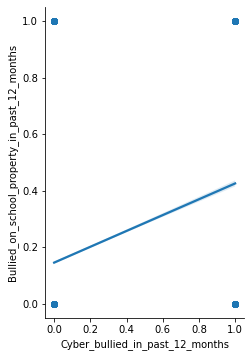

In [7]:
# # create a pairplot of several columns in the data, with "Bullied_on_school_property_in_past_12_months" as the target variable

sns.pairplot(df, x_vars=['Cyber_bullied_in_past_12_months'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

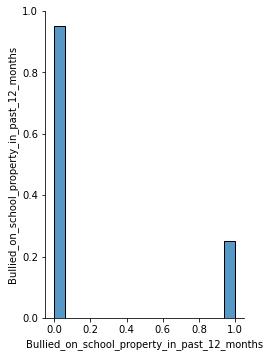

In [8]:
sns.pairplot(df, x_vars=['Bullied_on_school_property_in_past_12_months'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

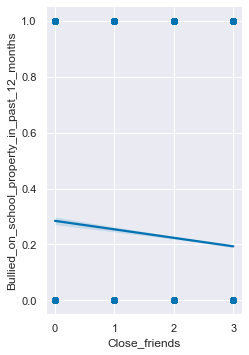

In [189]:
sns.pairplot(df, x_vars=['Close_friends'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')

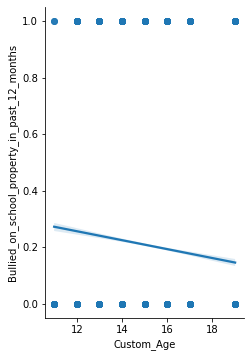

In [9]:
sns.pairplot(df, x_vars=[ 'Custom_Age'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

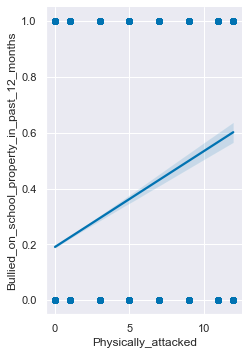

In [101]:
sns.pairplot(df, x_vars=[ 'Physically_attacked'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

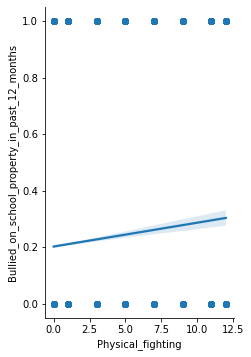

In [11]:
sns.pairplot(df, x_vars=[ 'Physical_fighting'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

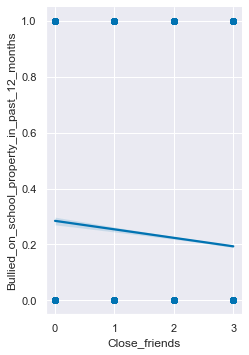

In [100]:
sns.pairplot(df, x_vars=['Close_friends'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

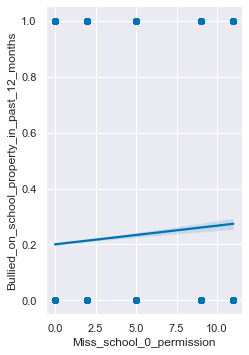

In [99]:
sns.pairplot(df, x_vars=['Miss_school_0_permission'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

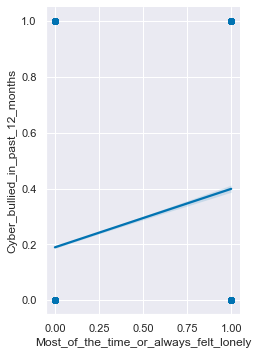

In [98]:
sns.pairplot(df, x_vars=[ 'Most_of_the_time_or_always_felt_lonely'], y_vars='Cyber_bullied_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

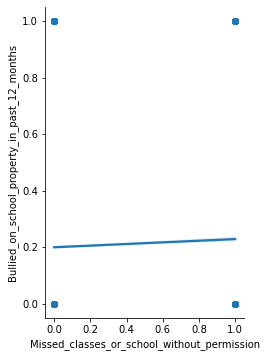

In [15]:
sns.pairplot(df, x_vars=[ 'Missed_classes_or_school_without_permission'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

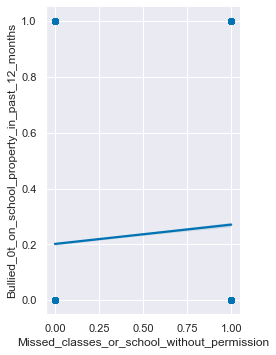

In [117]:
sns.pairplot(df, x_vars=[ 'Missed_classes_or_school_without_permission'], y_vars='Bullied_0t_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

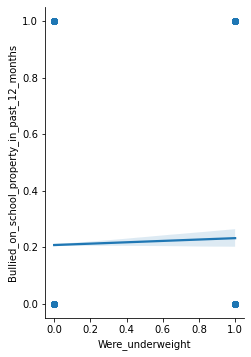

In [16]:
sns.pairplot(df, x_vars=['Were_underweight'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

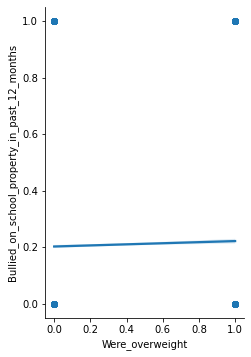

In [17]:
sns.pairplot(df, x_vars=[ 'Were_overweight'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

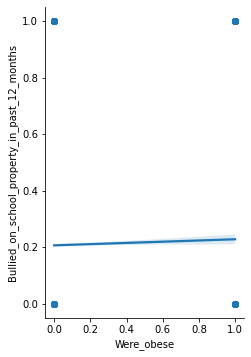

In [18]:
sns.pairplot(df, x_vars=[ 'Were_obese'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

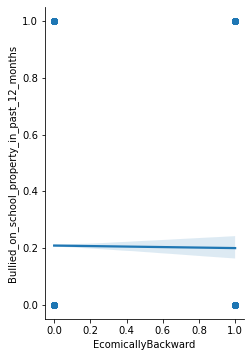

In [19]:
sns.pairplot(df, x_vars=[  'EcomicallyBackward'], y_vars='Bullied_on_school_property_in_past_12_months', height=5, aspect=0.7, kind='reg')
plt.show()

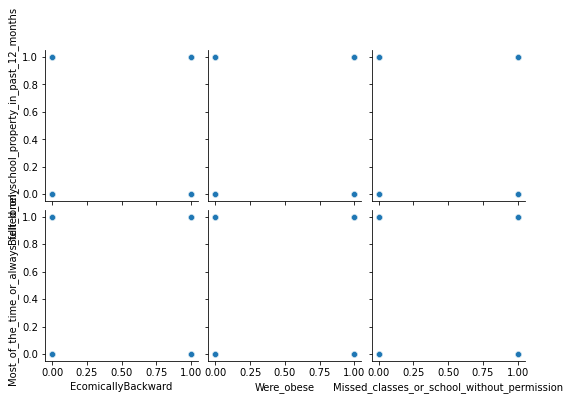

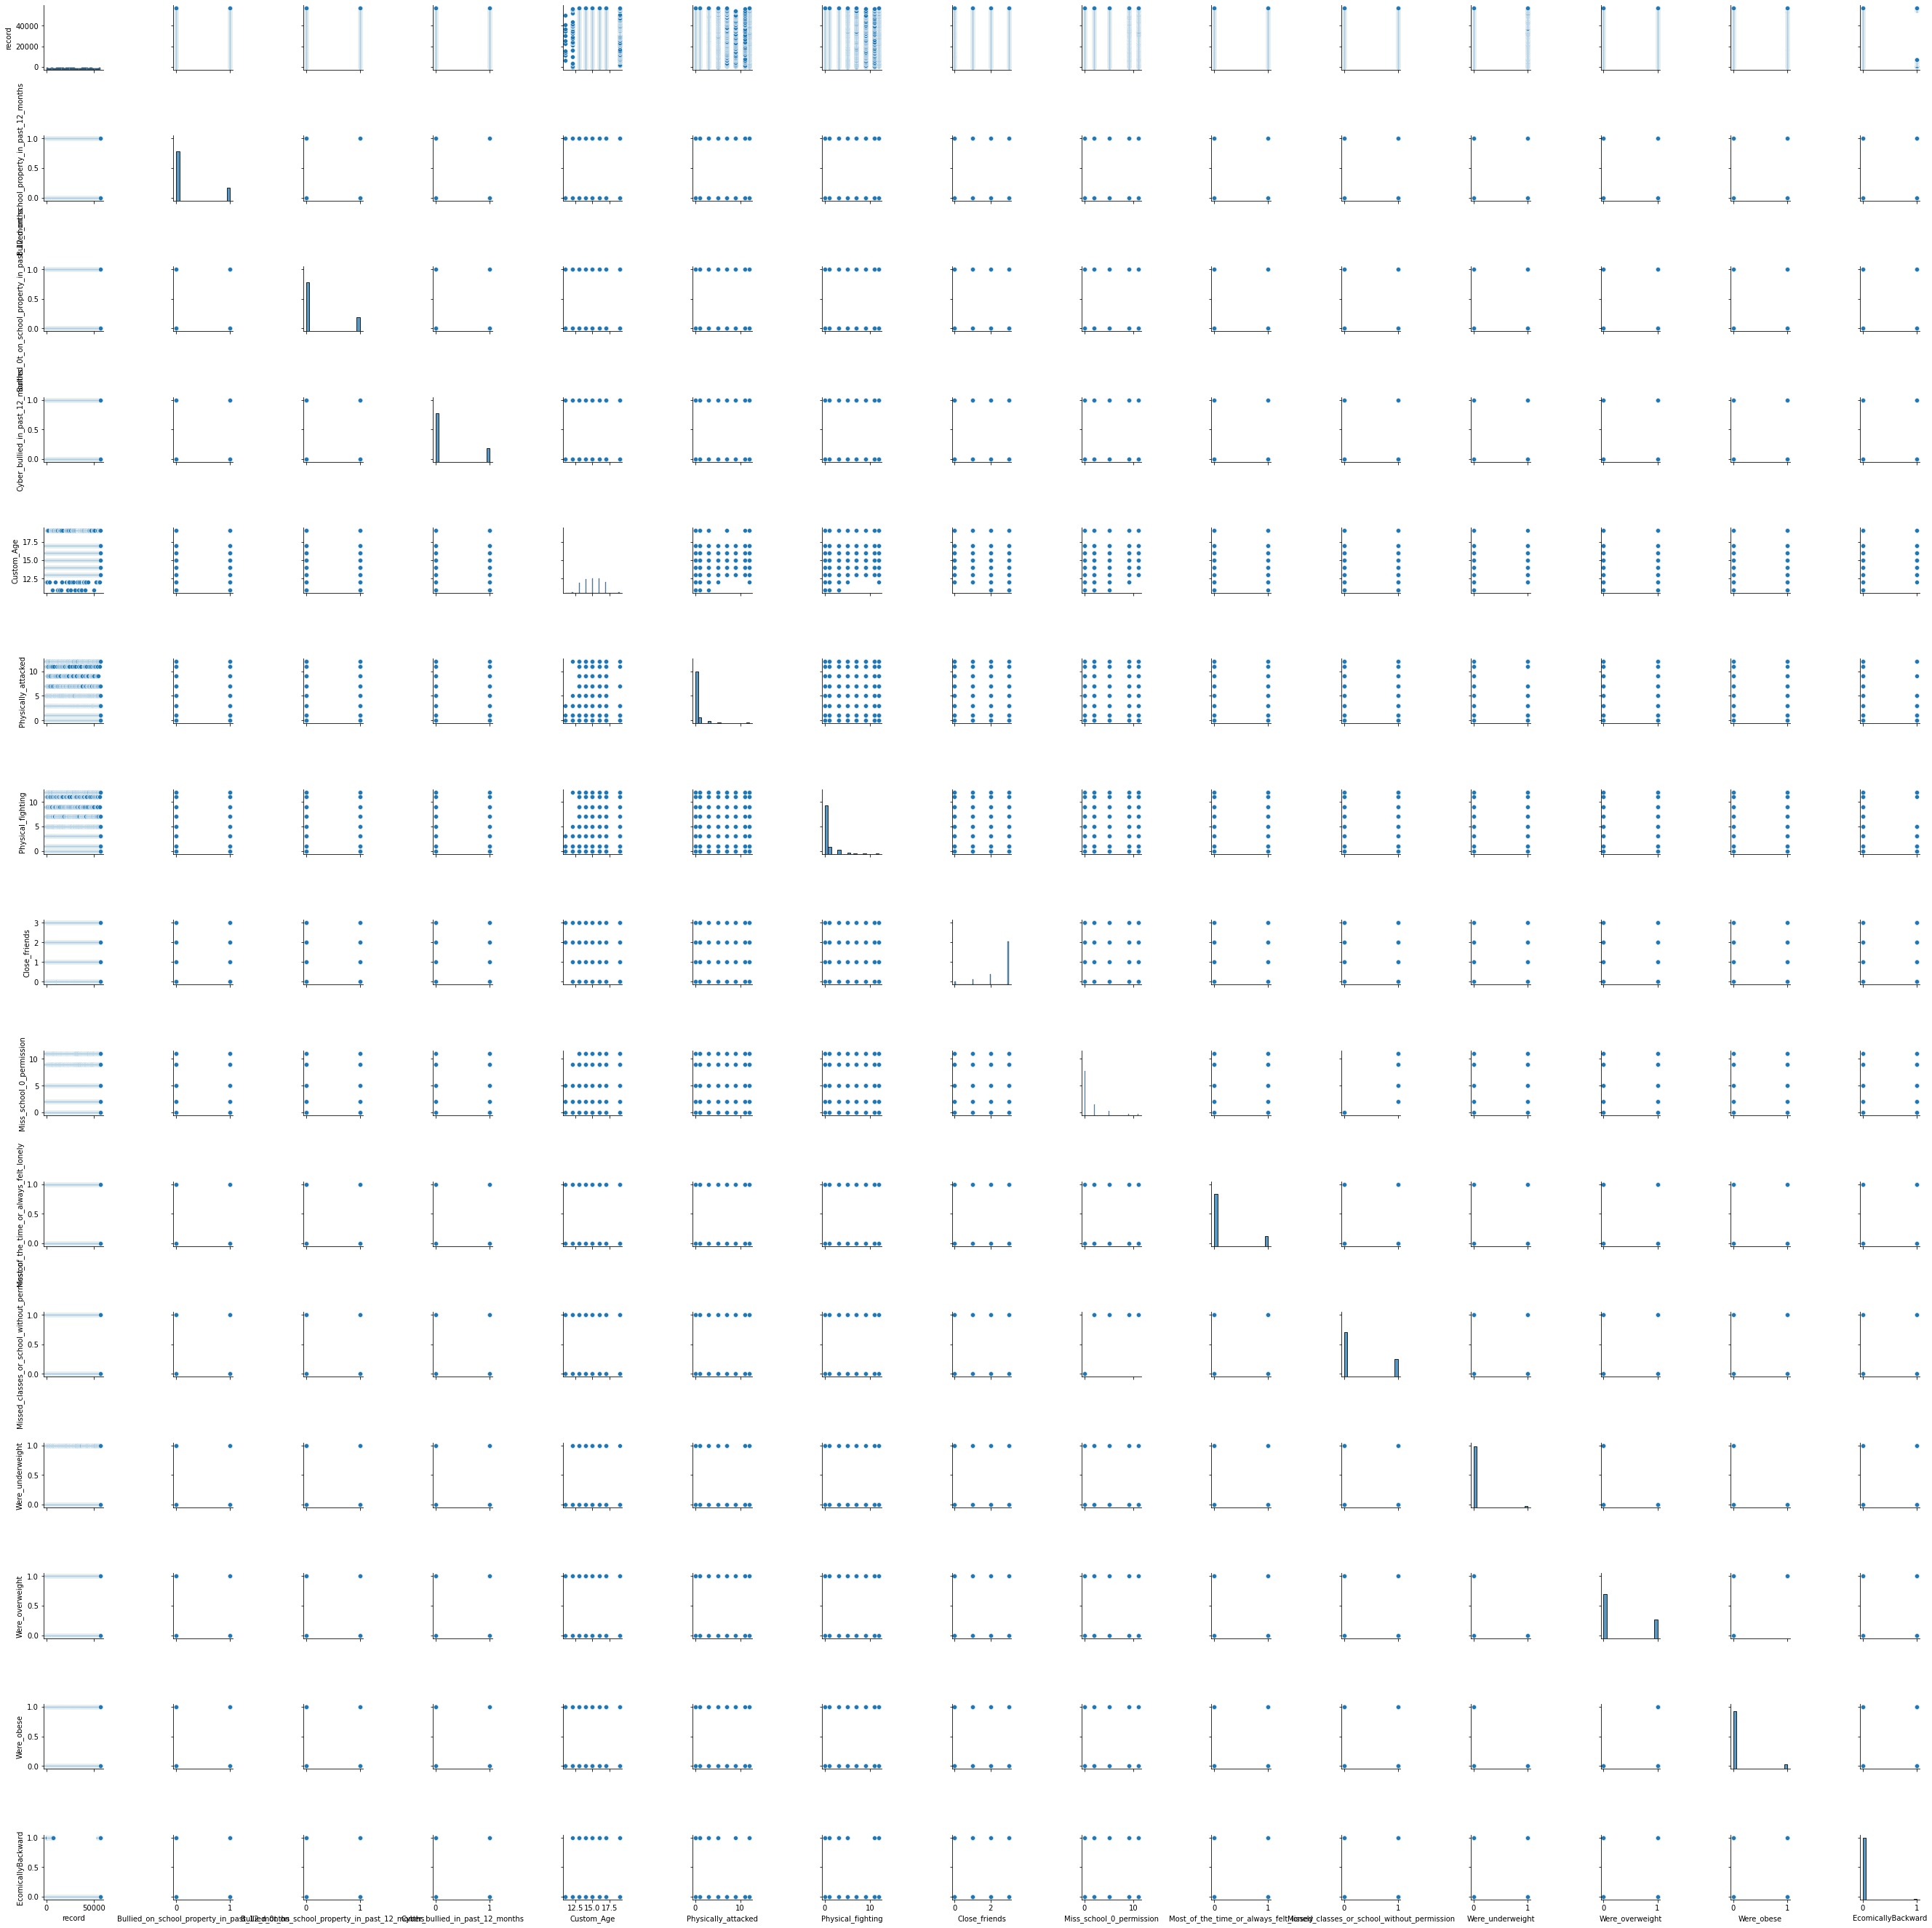

In [20]:
sns.pairplot(data=df, x_vars=['EcomicallyBackward', 'Were_obese','Missed_classes_or_school_without_permission'], y_vars=['Bullied_on_school_property_in_past_12_months','Most_of_the_time_or_always_felt_lonely'])
sns.pairplot(df)

In [21]:
# Correlation Matrix to show the relation between the features

df.corr()

,record,Bullied_on_school_property_in_past_12_months,Bullied_0t_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Physically_attacked,Physical_fighting,Close_friends,Miss_school_0_permission,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,EcomicallyBackward
record,1.000000,-0.016987,-0.003875,-0.010011,-0.002701,-0.014886,-0.007112,-0.006648,-0.006214,-0.020437,-0.000608,-0.011407,0.023680,0.001008,-0.058204
Bullied_on_school_property_in_past_12_months,-0.016987,1.000000,0.364445,0.287512,-0.053413,0.145201,0.040149,-0.064118,0.040031,0.180275,0.032270,0.008393,0.021578,0.013803,-0.002303
Bullied_0t_on_school_property_in_past_12_months,-0.003875,0.364445,1.000000,0.360791,0.041956,0.165613,0.094171,-0.040827,0.075922,0.178775,0.075341,0.001022,-0.007872,-0.011273,-0.004335
Cyber_bullied_in_past_12_months,-0.010011,0.287512,0.360791,1.000000,0.027763,0.131978,0.066516,-0.053017,0.072612,0.185478,0.074323,-0.005799,-0.013530,-0.011794,-0.002130
Custom_Age,-0.002701,-0.053413,0.041956,0.027763,1.000000,-0.017817,0.003177,-0.065350,0.113859,0.048767,0.124714,-0.020532,-0.082789,-0.031492,-0.006789
Physically_attacked,-0.014886,0.145201,0.165613,0.131978,-0.017817,1.000000,0.311487,-0.047616,0.088221,0.155986,0.077648,0.006313,0.022780,0.021570,-0.004595
Physical_fighting,-0.007112,0.040149,0.094171,0.066516,0.003177,0.311487,1.000000,-0.001092,0.136863,0.044393,0.117929,-0.001541,0.026250,0.022738,-0.003127
Close_friends,-0.006648,-0.064118,-0.040827,-0.053017,-0.065350,-0.047616,-0.001092,1.000000,-0.027659,-0.184194,-0.031193,-0.003886,-0.007743,-0.010497,-0.006987
Miss_school_0_permission,-0.006214,0.040031,0.075922,0.072612,0.113859,0.088221,0.136863,-0.027659,1.000000,0.069229,0.753127,-0.005879,0.015013,0.016039,0.014064
Most_of_the_time_or_always_felt_lonely,-0.020437,0.180275,0.178775,0.185478,0.048767,0.155986,0.044393,-0.184194,0.069229,1.000000,0.059772,0.011213,-0.007487,0.001998,-0.005565


In [22]:
# Copying the dataframe df to df_copied
df_copied=df

{'Most of the time', 'Always', 'Sometimes', 'Never', 'Rarely', ' '}


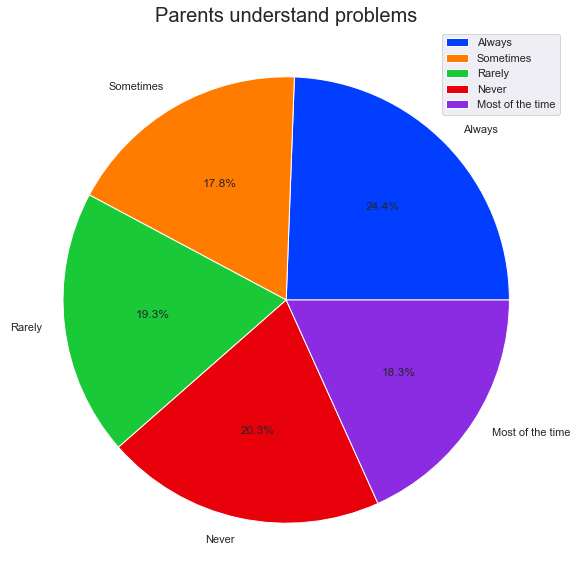

In [73]:
# Parents_understand_problems

freqList  = df_copied ['Parents_understand_problems'].tolist()
print(set(freqList))

Always = df_copied ['Parents_understand_problems']=='Always'
Sometimes = df_copied ['Parents_understand_problems']=='Sometimes'
Rarely = df_copied ['Parents_understand_problems']=='Rarely'
Never = df_copied ['Parents_understand_problems']=='Never'
Most_times = df_copied ['Parents_understand_problems']=='Most of the time'


labels = ['Always', 'Sometimes', 'Rarely', 'Never', 'Most of the time']
bulliedData = [(Always==True).sum(),(Sometimes==True).sum() , (Rarely==True).sum(), 
         (Never==True).sum(), (Most_times==True).sum()]
plt.figure(figsize=(10,10))
plt.axis("equal")
plt.pie(bulliedData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Parents understand problems',fontsize=20)
plt.show()


Text(0.5, 1.0, 'Felt lonely')

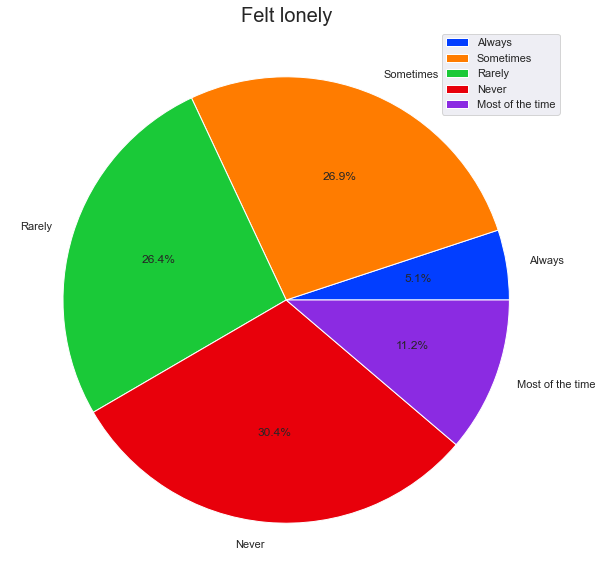

In [71]:
# Felt_lonely

Always = df_copied ['Felt_lonely']=='Always'
Sometimes = df_copied ['Felt_lonely']=='Sometimes'
Rarely = df_copied ['Felt_lonely']=='Rarely'
Never = df_copied ['Felt_lonely']=='Never'
Most_times = df_copied ['Felt_lonely']=='Most of the time'


labels = ['Always', 'Sometimes', 'Rarely', 'Never', 'Most of the time']
bulliedData = [(Always==True).sum(),(Sometimes==True).sum() , (Rarely==True).sum(), 
         (Never==True).sum(), (Most_times==True).sum()]
plt.figure(figsize=(10,10))
plt.axis("equal")
plt.pie(bulliedData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Felt lonely',fontsize=20)

Text(0.5, 1.0, 'Other_students_kind_and_helpful')

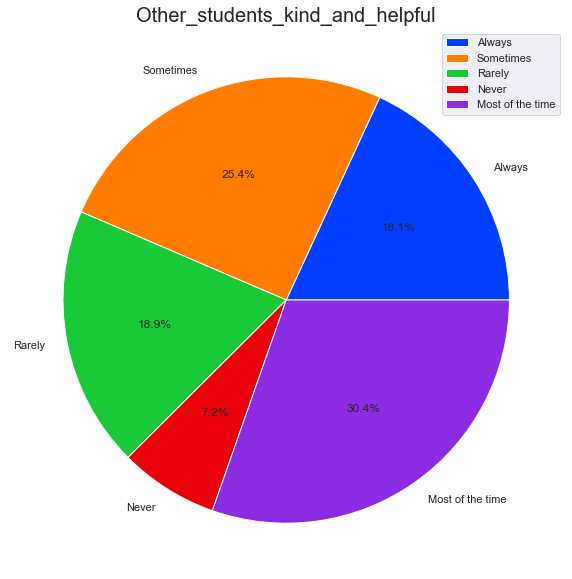

In [74]:
# Felt_lonely

Always = df_copied ['Other_students_kind_and_helpful']=='Always'
Sometimes = df_copied ['Other_students_kind_and_helpful']=='Sometimes'
Rarely = df_copied ['Other_students_kind_and_helpful']=='Rarely'
Never = df_copied ['Other_students_kind_and_helpful']=='Never'
Most_times = df_copied ['Other_students_kind_and_helpful']=='Most of the time'


labels = ['Always', 'Sometimes', 'Rarely', 'Never', 'Most of the time']
bulliedData = [(Always==True).sum(),(Sometimes==True).sum() , (Rarely==True).sum(), 
         (Never==True).sum(), (Most_times==True).sum()]
plt.figure(figsize=(10,10))
plt.axis("equal")
plt.pie(bulliedData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Other_students_kind_and_helpful',fontsize=20)

Text(0, 0.5, 'Number of people bullied in all categories')

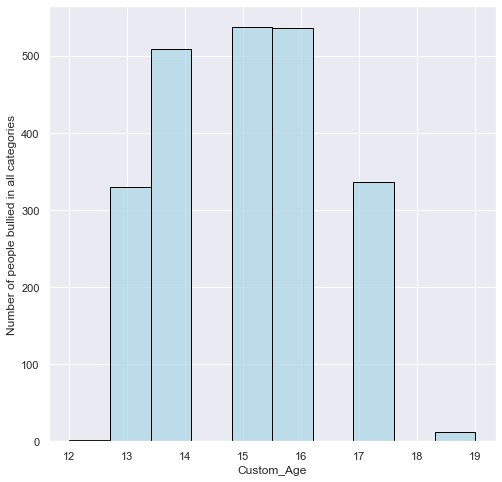

In [173]:
#Intersection of all three bullying cases
bullied=df.loc[(df['Cyber_bullied_in_past_12_months']==1)&(df['Bullied_on_school_property_in_past_12_months']==1)&(df['Bullied_0t_on_school_property_in_past_12_months']==1)]

#histogram of bullied in each age group, i.e, bullied in any one, two or three of the categories
sns.histplot(bullied['Custom_Age'],bins=10,color='lightblue',edgecolor='black')
plt.ylabel('Number of people bullied in all categories')

Text(0, 0.5, 'Number of people bullied in one or more bullying category')

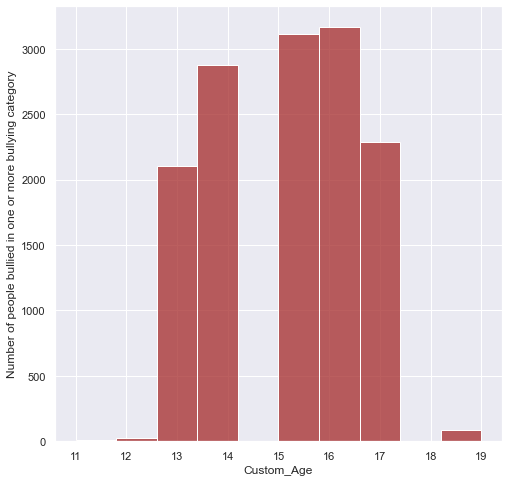

In [183]:
#Union of all three bullying cases
bulliedinany=df.loc[(df['Cyber_bullied_in_past_12_months']==1)|(df['Bullied_on_school_property_in_past_12_months']==1)|(df['Bullied_0t_on_school_property_in_past_12_months']==1)]

#histogram of bullied in each age group all together
sns.histplot(bulliedinany['Custom_Age'],bins=10,color='brown',edgecolor='white')
plt.ylabel('Number of people bullied in one or more bullying category')

In [ ]:
#Union of all three bullying cases
bulliedinany=df.loc[(df['Cyber_bullied_in_past_12_months']==1)|(df['Bullied_on_school_property_in_past_12_months']==1)|(df['Bullied_0t_on_school_property_in_past_12_months']==1)]

#histogram of bullied in each age group all together
sns.histplot(bulliedinany['Custom_Age'],bins=10,color='brown',edgecolor='pink')
plt.ylabel('Number of people bullied in one or more bullying category')

In [185]:
cyberbullied=df.loc[df['Cyber_bullied_in_past_12_months']==1]

In [186]:
# Sorted array of unique ages in the dataframe

arr=np.sort(pd.unique(cyber_bullied['Custom_Age']))
arr

# Series of ages in the dataframe
ages=pd.Series(arr) 
ages

0    11.0
1    12.0
2    13.0
3    14.0
4    15.0
5    16.0
6    17.0
7    19.0
dtype: float64

In [187]:
# Finding the number of people cyberbullied in each age group

cyber_bullied_11=cyber_bullied['Custom_Age'].value_counts()[11]
cyber_bullied_12=cyber_bullied['Custom_Age'].value_counts()[12]
cyber_bullied_13=cyber_bullied['Custom_Age'].value_counts()[13]
cyber_bullied_14=cyber_bullied['Custom_Age'].value_counts()[14]
cyber_bullied_15=cyber_bullied['Custom_Age'].value_counts()[15]
cyber_bullied_16=cyber_bullied['Custom_Age'].value_counts()[16]
cyber_bullied_17=cyber_bullied['Custom_Age'].value_counts()[17]
cyber_bullied_19=cyber_bullied['Custom_Age'].value_counts()[19]

cyber_bullied_eachagegroup=pd.Series(np.array([cyber_bullied_11,cyber_bullied_12,cyber_bullied_13,cyber_bullied_14,cyber_bullied_15,cyber_bullied_16,cyber_bullied_17,cyber_bullied_19]))
cyber_bullied_eachagegroup

0       3
1       6
2    1039
3    1542
4    1789
5    1803
6    1299
7      50
dtype: int64

In [28]:
# Creating a dataframe of age and number of people cyberbullied in each age group
da=pd.concat([ages,cyber_bullied_eachagegroup],axis=1)
da.columns=['Age','Number of people']
da

,Age,Number of people
0,11.0,3
1,12.0,6
2,13.0,1039
3,14.0,1542
4,15.0,1789
5,16.0,1803
6,17.0,1299
7,19.0,50


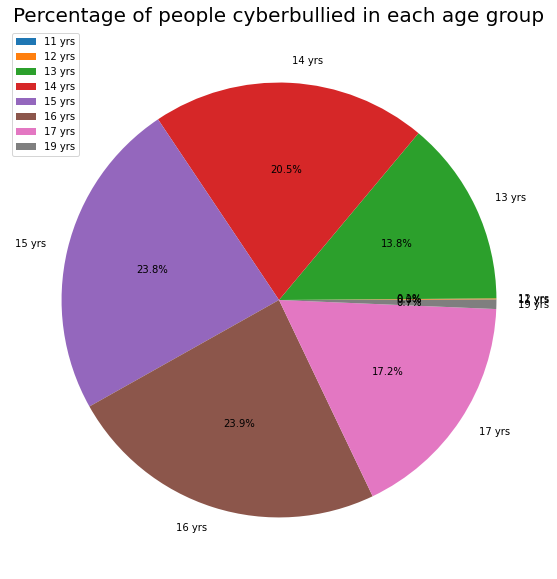

In [29]:
# Pie chart showing the percentage of people bullied in each age group


labels=['11 yrs','12 yrs','13 yrs','14 yrs','15 yrs','16 yrs','17 yrs','19 yrs']
fig, ax = plt.subplots(figsize=(10, 10))

plt.pie(da['Number of people'],labels=labels, autopct='%1.1f%%')
plt.title('Percentage of people cyberbullied in each age group',fontsize=20)

plt.legend(loc='upper left')
plt.show()




## Proportion of male and females cyberbullied in the past twelve months in each age group

In [30]:
# Dataframe containing the age and gender of people who were cyberbullied 

age_gender_cyber=pd.concat([cyber_bullied['Custom_Age'],cyber_bullied['Gender']],axis=1)
age_gender_cyber

,Custom_Age,Gender
22,13.0,Male
39,13.0,Female
41,13.0,Male
48,14.0,Female
52,14.0,Female
...,...,...
56952,15.0,Male
56955,15.0,Male
56957,16.0,Female
56975,15.0,Male


In [31]:
# NUMBER OF PEOPLE IN EACH GENDER WHO WERE CYBERBULLIED

#13 AGE GROUP
cyber_bullied_11age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==11]
cyber_bullied_11age_female=cyber_bullied_11age['Gender'].value_counts()['Female']
cyber_bullied_11age_male=cyber_bullied_11age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 11 age group-->',cyber_bullied_11age_female)
print('Number of Males cyber bullied in 11 age group-->',cyber_bullied_11age_male)
print('\n')

#12 AGE GROUP
cyber_bullied_12age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==12]
cyber_bullied_12age_female=cyber_bullied_12age['Gender'].value_counts()['Female']
cyber_bullied_12age_male=cyber_bullied_12age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 12 age group-->',cyber_bullied_12age_female)
print('Number of Males cyber bullied in 12 age group-->',cyber_bullied_12age_male)
print('\n')

#13 AGE GROUP
cyber_bullied_13age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==13]
cyber_bullied_13age_female=cyber_bullied_13age['Gender'].value_counts()['Female']
cyber_bullied_13age_male=cyber_bullied_13age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 13 age group-->',cyber_bullied_13age_female)
print('Number of Males cyber bullied in 13 age group-->',cyber_bullied_13age_male)
print('\n')

#14 AGE GROUP
cyber_bullied_14age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==14]
cyber_bullied_14age_female=cyber_bullied_14age['Gender'].value_counts()['Female']
cyber_bullied_14age_male=cyber_bullied_14age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 14 age group-->',cyber_bullied_14age_female)
print('Number of Males cyber bullied in 14 age group-->',cyber_bullied_14age_male)
print('\n')

#15 AGE GROUP
cyber_bullied_15age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==15]
cyber_bullied_15age_female=cyber_bullied_15age['Gender'].value_counts()['Female']
cyber_bullied_15age_male=cyber_bullied_15age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 15 age group-->',cyber_bullied_15age_female)
print('Number of Males cyber bullied in 15 age group-->',cyber_bullied_15age_male)
print('\n')

#16 AGE GROUP
cyber_bullied_16age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==16]
cyber_bullied_16age_female=cyber_bullied_16age['Gender'].value_counts()['Female']
cyber_bullied_16age_male=cyber_bullied_16age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 16 age group-->',cyber_bullied_16age_female)
print('Number of Males cyber bullied in 16 age group-->',cyber_bullied_16age_male)
print('\n')

#17 AGE GROUP
cyber_bullied_17age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==17]
cyber_bullied_17age_female=cyber_bullied_17age['Gender'].value_counts()['Female']
cyber_bullied_17age_male=cyber_bullied_17age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 17 age group-->',cyber_bullied_17age_female)
print('Number of Males cyber bullied in 17 age group-->',cyber_bullied_17age_male)
print('\n')


#19 AGE GROUP
cyber_bullied_19age=age_gender_cyber.loc[age_gender_cyber['Custom_Age']==19]
cyber_bullied_19age_female=cyber_bullied_19age['Gender'].value_counts()['Female']
cyber_bullied_19age_male=cyber_bullied_19age['Gender'].value_counts()['Male']

print('Number of Females cyber bullied in 19 age group-->',cyber_bullied_19age_female)
print('Number of Males cyber bullied in 19 age group-->',cyber_bullied_19age_male)
print('\n')




Number of Females cyber bullied in 11 age group--> 1
Number of Males cyber bullied in 11 age group--> 2


Number of Females cyber bullied in 12 age group--> 5
Number of Males cyber bullied in 12 age group--> 1


Number of Females cyber bullied in 13 age group--> 683
Number of Males cyber bullied in 13 age group--> 356


Number of Females cyber bullied in 14 age group--> 1025
Number of Males cyber bullied in 14 age group--> 517


Number of Females cyber bullied in 15 age group--> 1222
Number of Males cyber bullied in 15 age group--> 567


Number of Females cyber bullied in 16 age group--> 1190
Number of Males cyber bullied in 16 age group--> 613


Number of Females cyber bullied in 17 age group--> 879
Number of Males cyber bullied in 17 age group--> 420


Number of Females cyber bullied in 19 age group--> 25
Number of Males cyber bullied in 19 age group--> 25




In [32]:
# ARRAY OF COUNT OF FEMALES AND MALES CYBERBULLIED IN EACH AGE GROUP

female_cyberbullied= np.array([cyber_bullied_11age_female,cyber_bullied_12age_female,cyber_bullied_13age_female,cyber_bullied_14age_female,cyber_bullied_15age_female,cyber_bullied_16age_female,cyber_bullied_17age_female,cyber_bullied_19age_female])
print(female_cyberbullied)

male_cyberbullied=np.array([cyber_bullied_11age_male,cyber_bullied_12age_male,cyber_bullied_13age_male,cyber_bullied_14age_male,cyber_bullied_15age_male,cyber_bullied_16age_male,cyber_bullied_17age_male,cyber_bullied_19age_male])
print(male_cyberbullied)

[   1    5  683 1025 1222 1190  879   25]
[  2   1 356 517 567 613 420  25]


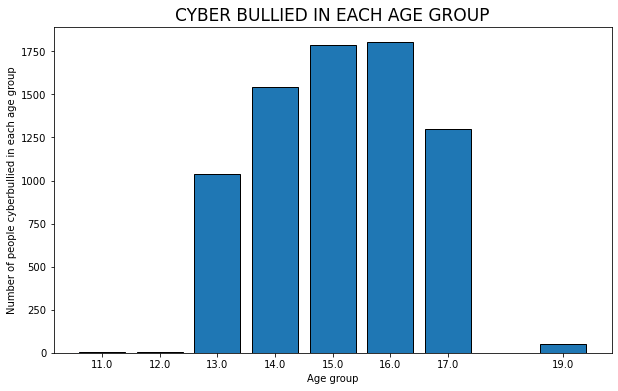

In [33]:
# Increasing the figure size

plt.figure(figsize=(10,6))

x_pos = [0,1,2,3,4,5,6,8]

plt.bar(x_pos,da['Number of people'],  edgecolor='black')
plt.xlabel('Age group')
plt.ylabel('Number of people cyberbullied in each age group')
plt.xticks(x_pos, da['Age'])
plt.title('CYBER BULLIED IN EACH AGE GROUP',fontsize=17)
plt.show()



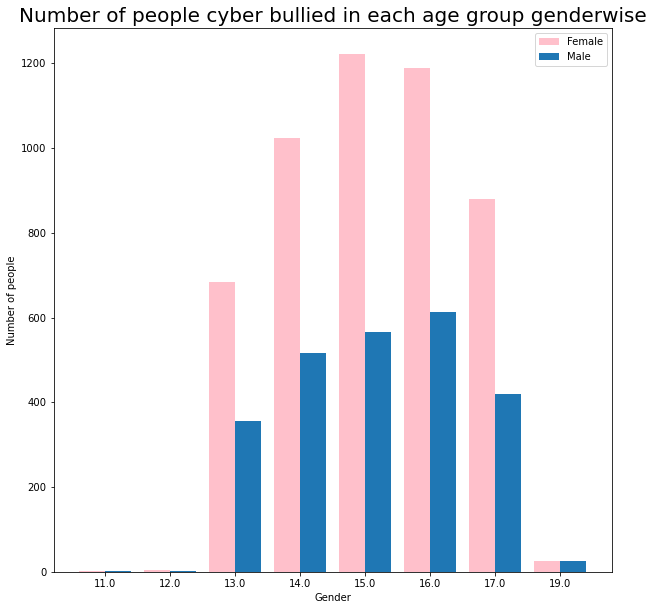

In [34]:
# Bar Plot showing number of people cyberbullied in each age group genderwise

X=ages
X_axis = np.arange(len(X))

plt.figure(figsize=(10,10))
plt.bar(X_axis - 0.2, female_cyberbullied, 0.4,label='Female',color='pink')
plt.bar(X_axis + 0.2, male_cyberbullied, 0.4, label = 'Male')
 
plt.xticks(X_axis, X)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("Number of people cyber bullied in each age group genderwise",fontsize=20)
plt.legend()

plt.show()

In [59]:
#Creating a table for custom age and economical situation of cyberbullied people

cyber_bullied_age_econ=pd.concat([cyber_bullied['Custom_Age'],cyber_bullied['EcomicallyBackward']],axis=1)
cyber_bullied_age_econ

#Finding the columns of people who are cyberbullied and economically backward

cyber_bullied_age_econ_yes=cyber_bullied_age_econ.loc[cyber_bullied_age_econ['EcomicallyBackward']==1]
cyber_bullied_age_econ_yes



,Custom_Age,EcomicallyBackward
41,13.0,1
196,15.0,1
225,13.0,1
323,15.0,1
386,13.0,1
...,...,...
56565,15.0,1
56890,16.0,1
56897,16.0,1
56957,16.0,1


/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


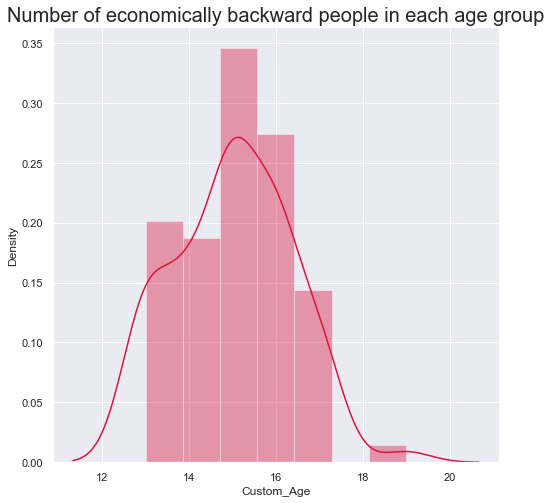

In [93]:
# Set your custom color palette
sns.set_palette(sns.color_palette("colorblind"))

sns.distplot(cyber_bullied_age_econ_yes['Custom_Age'],color='#DC143C')
plt.title('Number of economically backward people in each age group',fontsize=20)
plt.show()
#sns.color_palette("rocket", as_cmap=True)

In [94]:
## create the feature matrix X by dropping certain columns from the data

X = df.drop('Bullied_on_school_property_in_past_12_months', axis=1)
X = X.drop('record', axis=1)
X = X.drop('Gender', axis=1)
X = X.drop('Felt_lonely', axis=1)
X = X.drop('Other_students_kind_and_helpful', axis=1)
X = X.drop('Parents_understand_problems', axis=1)

X

,Bullied_0t_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Physically_attacked,Physical_fighting,Close_friends,Miss_school_0_permission,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,EcomicallyBackward
2,0.0,0.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,16.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,13.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,0.0,0.0,15.0,0.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,0
13,0.0,0.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,1.0,0.0,16.0,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1
56974,0.0,0.0,16.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
56975,0.0,1.0,15.0,12.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
56976,1.0,0.0,16.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# Bullied on school property in the past 12 months

In [190]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, df['Bullied_on_school_property_in_past_12_months'], shuffle=True, test_size=0.2, random_state=42)



# create a logistic regression model and fit it to the training data

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Define the number of folds for cross-validation
#k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate the F1 score using cross-validation
f1_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_macro')

# make predictions on the test data using the logistic regression model

y_pred = lr.predict(X_test)

# print the accuracy score and confusion matrix for the logistic regression model

##print("Accuracy: ", accuracy_score(y_test, y_pred))
##print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

# Print the mean and standard deviation of the F1 scores for logistic regression model
print('F1 Score_Logistic (mean):', np.mean(f1_scores))
print('F1 Score_Logistic (std):', np.std(f1_scores))
print('accuracy score: ',accuracy_score(y_test, y_pred))
print('Logistic regression predictions(bullying inside school)',y_pred)

/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

F1 Score_Logistic (mean): 0.647188142450221
F1 Score_Logistic (std): 0.0033337214878392763
accuracy score:  0.8142920814143515
Logistic regression predictions [0. 1. 0. ... 0. 0. 0.]


/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [202]:
print('Confusion matrix(inside school bullying)-->\n',confusion_matrix(y_train, lr.predict(X_train)))

Confusion matrix(inside school bullying)-->
 [[19929  1385]
 [ 3667  1942]]


In [158]:
# create a decision tree classifier model and fit it to the training data


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Calculate the F1 score using cross-validation
f1_scoresdt = cross_val_score(dtc, X_train, y_train, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores for decision tree classifier model
print('F1 Score (mean):', np.mean(f1_scoresdt))
print('F1 Score (std):', np.std(f1_scoresdt))



F1 Score (mean): 0.625064445552331
F1 Score (std): 0.01282696053181065


In [159]:
# create a random forest classifier model and fit it to the training data

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Calculate the F1 score using cross-validation
f1_scoresrf = cross_val_score(rfc, X_train, y_train, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores for random forest classifier model
print('F1 Score (mean):', np.mean(f1_scoresrf))
print('F1 Score (std):', np.std(f1_scoresrf))

F1 Score (mean): 0.6383509897309005
F1 Score (std): 0.01031721498339573


In [141]:
# make predictions on the test data using the decision tree and random forest models

#y_pred = dtc.predict(X_test)
#y_pred_binary = (y_pred >= 0.5).astype(int)

y_pred = dtc.predict(X_test)


# print the predictions from the decision tree and random forest models

print('Decision tree predictions:', y_pred)
#print("F1 Score:", f1_scoresdt(y_test, y_pred_binary))

##y_pred = rfc.predict(X_test)
y_pred = rfc.predict(X_test)
##y_pred_binary = (y_pred >= 0.5).astype(int)

print('Random forest predictions:', y_pred)
##print("F1 Score:", f1_scoresrf(y_test, y_pred_binary))


# Economic underweiht and fighting are three major factors as per above graphs shows the variations that this become the highly main features of the child being abused

Decision tree predictions: [0. 1. 0. ... 0. 0. 0.]
Random forest predictions: [0. 1. 0. ... 0. 0. 0.]


In summary, the statement suggests that the random forest model is better in predicting the target value as compared to the logistic regression and decision tree models based on the results of the F1 score. However, it is important to note that the conclusion is based on the specific dataset and modeling choices used in the code, and may not generalize to other datasets or modeling scenarios.

# Bullied out of school property in the past 12 months

In [142]:
## create the feature matrix Y by dropping certain columns from the data

Y = df.drop('Bullied_0t_on_school_property_in_past_12_months', axis=1)
Y = Y.drop('record', axis=1)
Y = Y.drop('Gender', axis=1)
Y = Y.drop('Felt_lonely', axis=1)
Y = Y.drop('Other_students_kind_and_helpful', axis=1)
Y = Y.drop('Parents_understand_problems', axis=1)

Y

,Bullied_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Physically_attacked,Physical_fighting,Close_friends,Miss_school_0_permission,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,EcomicallyBackward
2,0.0,0.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,16.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,13.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,0.0,0.0,15.0,0.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,0
13,0.0,0.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,0.0,0.0,16.0,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1
56974,0.0,0.0,16.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
56975,0.0,1.0,15.0,12.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
56976,0.0,0.0,16.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [194]:
# split the data into training and testing sets

X_train_ot, X_test_ot, y_train_ot, y_test_ot = train_test_split(Y, df['Bullied_0t_on_school_property_in_past_12_months'], shuffle=True, test_size=0.2, random_state=42)



# create a logistic regression model and fit it to the training data

lr = LogisticRegression()
lr.fit(X_train_ot, y_train_ot)

# Define the number of folds for cross-validation
#k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate the F1 score using cross-validation
f1_scores_ot = cross_val_score(lr, X_train_ot, y_train_ot, cv=5, scoring='f1_macro')

# make predictions on the test data using the logistic regression model

y_pred_ot = lr.predict(X_test_ot)

# print the accuracy score and confusion matrix for the logistic regression model

##print("Accuracy: ", accuracy_score(y_test, y_pred))
##print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

# Print the mean and standard deviation of the F1 scores
print('F1 Score (mean):', np.mean(f1_scores_ot))
print('F1 Score (std):', np.std(f1_scores_ot))
print('Logistic regression predictions(bullying outside school)',y_pred_ot)

/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

F1 Score (mean): 0.670868337454344
F1 Score (std): 0.0058725935846204265
Logistic regression predictions(bullying outside school) [0. 1. 0. ... 0. 0. 0.]


/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [201]:
print('Confusion matrix(out of school bullying)-->\n',confusion_matrix(y_train_ot, lr.predict(X_train_ot)))

Confusion matrix(out of school bullying)-->
 [[20065   950]
 [ 3906  2002]]


In [144]:
# create a decision tree regression model and fit it to the training data

#dt = DecisionTreeRegressor()
#dt.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_ot, y_train_ot)

# Calculate the F1 score using cross-validation
f1_scoresdt_ot = cross_val_score(dtc, X_train_ot, y_train_ot, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores
print('F1 Score (mean):', np.mean(f1_scoresdt_ot))
print('F1 Score (std):', np.std(f1_scoresdt_ot))




F1 Score (mean): 0.6484649347799512
F1 Score (std): 0.012891501674166358


In [145]:
# create a random forest regression model and fit it to the training data

rfc = RandomForestClassifier()
rfc.fit(X_train_ot, y_train_ot)

# Calculate the F1 score using cross-validation
f1_scoresrf_ot = cross_val_score(rfc, X_train_ot, y_train_ot, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores
print('F1 Score (mean):', np.mean(f1_scoresrf_ot))
print('F1 Score (std):', np.std(f1_scoresrf_ot))

F1 Score (mean): 0.6659019554328742
F1 Score (std): 0.008743354010819377


In [146]:
# make predictions on the test data using the decision tree and random forest models

#y_pred = dtc.predict(X_test)
#y_pred_binary = (y_pred >= 0.5).astype(int)

y_pred_ot = dtc.predict(X_test_ot)


# print the predictions from the decision tree and random forest models

print('Decision tree predictions:', y_pred_ot)
#print("F1 Score:", f1_scoresdt(y_test, y_pred_binary))

##y_pred = rfc.predict(X_test)
y_pred_ot = rfc.predict(X_test_ot)
##y_pred_binary = (y_pred >= 0.5).astype(int)

print('Random forest predictions:', y_pred_ot)
##print("F1 Score:", f1_scoresrf(y_test, y_pred_binary))


# Economic underweight and fighting are three major factors as per above graphs shows the variations that this become the highly main features of the child being abused

Decision tree predictions: [0. 0. 0. ... 0. 0. 0.]
Random forest predictions: [0. 1. 0. ... 0. 0. 0.]


# Cyberbullied in the past 12 months

In [147]:
## create the feature matrix Z by dropping certain columns from the data

Z = df.drop('Cyber_bullied_in_past_12_months', axis=1)
Z = Z.drop('record', axis=1)
Z = Z.drop('Gender', axis=1)
Z = Z.drop('Felt_lonely', axis=1)
Z = Z.drop('Other_students_kind_and_helpful', axis=1)
Z = Z.drop('Parents_understand_problems', axis=1)

Z

,Bullied_on_school_property_in_past_12_months,Bullied_0t_on_school_property_in_past_12_months,Custom_Age,Physically_attacked,Physical_fighting,Close_friends,Miss_school_0_permission,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,EcomicallyBackward
2,0.0,0.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,16.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,13.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,0.0,0.0,15.0,0.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,0
13,0.0,0.0,14.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,0.0,1.0,16.0,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,1
56974,0.0,0.0,16.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
56975,0.0,0.0,15.0,12.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
56976,0.0,1.0,16.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [193]:
# split the data into training and testing sets

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(Z, df['Cyber_bullied_in_past_12_months'], shuffle=True, test_size=0.2, random_state=42)



# create a logistic regression model and fit it to the training data

lr = LogisticRegression()
lr.fit(X_train_cb, y_train_cb)

# Define the number of folds for cross-validation
#k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate the F1 score using cross-validation
f1_scores_cb = cross_val_score(lr, X_train_cb, y_train_cb, cv=5, scoring='f1_macro')

# make predictions on the test data using the logistic regression model

y_pred_cb = lr.predict(X_test_cb)

# print the accuracy score and confusion matrix for the logistic regression model

##print("Accuracy: ", accuracy_score(y_test, y_pred))
##print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

# Print the mean and standard deviation of the F1 scores
print('F1 Score (mean):', np.mean(f1_scores_cb))
print('F1 Score (std):', np.std(f1_scores_cb))
print('Logistic regression predictions(bullying inside school)',y_pred_cb)

/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

F1 Score (mean): 0.6561067430263147
F1 Score (std): 0.005923254679397863
Logistic regression predictions(bullying inside school) [0. 1. 0. ... 0. 0. 0.]


/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devichandran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [203]:
print('Confusion matrix(cyber bullying)-->\n',confusion_matrix(y_train_cb, lr.predict(X_train_cb)))

Confusion matrix(cyber bullying)-->
 [[19639  1253]
 [ 4074  1957]]


In [149]:
# create a decision tree regression model and fit it to the training data

#dt = DecisionTreeRegressor()
#dt.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_cb, y_train_cb)

# Calculate the F1 score using cross-validation
f1_scoresdt_cb = cross_val_score(dtc, X_train_cb, y_train_cb, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores
print('F1 Score (mean):', np.mean(f1_scoresdt_cb))
print('F1 Score (std):', np.std(f1_scoresdt_cb))




F1 Score (mean): 0.6176054439759959
F1 Score (std): 0.008086697163687007


In [150]:
# create a random forest regression model and fit it to the training data

rfc = RandomForestClassifier()
rfc.fit(X_train_cb, y_train_cb)

# Calculate the F1 score using cross-validation
f1_scoresrf_cb = cross_val_score(rfc, X_train_cb, y_train_cb, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores
print('F1 Score (mean):', np.mean(f1_scoresrf_cb))
print('F1 Score (std):', np.std(f1_scoresrf_cb))

F1 Score (mean): 0.6301487006604304
F1 Score (std): 0.007493672279267037


In [151]:
# make predictions on the test data using the decision tree and random forest models

#y_pred = dtc.predict(X_test)
#y_pred_binary = (y_pred >= 0.5).astype(int)

y_pred_cb = dtc.predict(X_test_cb)


# print the predictions from the decision tree and random forest models

print('Decision tree predictions:', y_pred_cb)
#print("F1 Score:", f1_scoresdt(y_test, y_pred_binary))

##y_pred = rfc.predict(X_test)
y_pred_cb = rfc.predict(X_test_cb)
##y_pred_binary = (y_pred >= 0.5).astype(int)

print('Random forest predictions:', y_pred_cb)
##print("F1 Score:", f1_scoresrf(y_test, y_pred_binary))


# Economic underweiht and fighting are three major factors as per above graphs shows the variations that this become the highly main features of the child being abused

Decision tree predictions: [0. 1. 0. ... 0. 0. 0.]
Random forest predictions: [0. 1. 0. ... 0. 0. 0.]
